In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Dataset 확인

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 우리가 다루는 문제에서 feature은
  - Pclass, Age, SibSp, Parch, Fare이며,
  - 예측하려는 target label은 Survived 이다.

In [3]:
# 각 feature가 가진 통계치들을 반환해주기 : describe()

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 Null data check

In [5]:
# 각 열의 NaN 비율 알아보기

for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [6]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


#### null data 비율
- Age (둘 다 약 20%)
- Cabin (둘 다 약 80%)
- Embarked (Train - 약 0.22%)
- Fare (Test - 약 0.24%)

<AxesSubplot:>

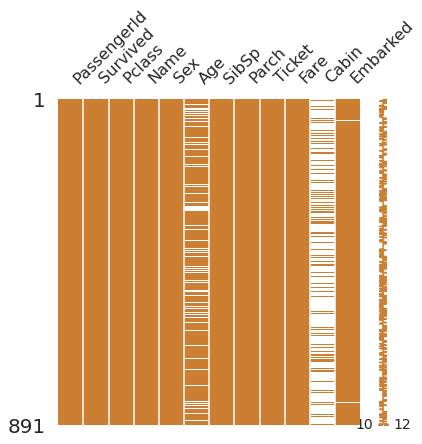

In [7]:
msno.matrix(df=df_train.iloc[:, :], figsize=(6, 6), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

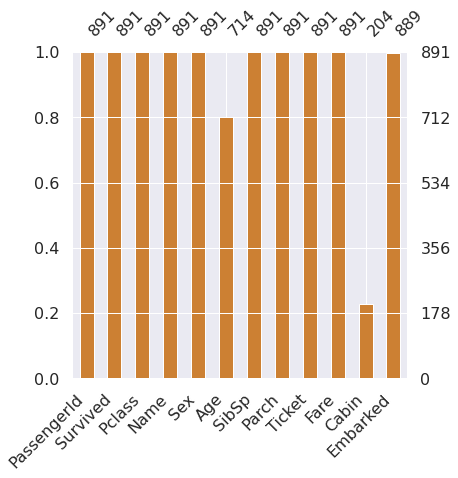

In [8]:
msno.bar(df=df_train.iloc[:, :], figsize=(6, 6), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

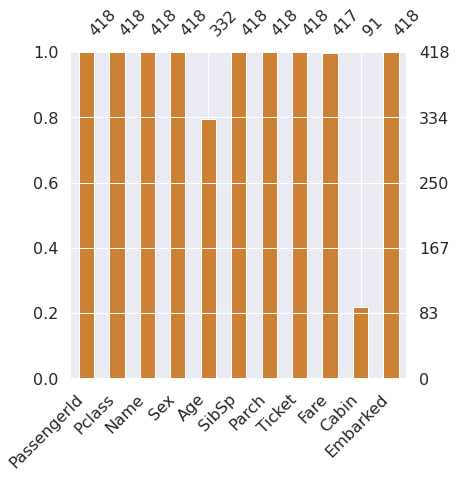

In [9]:
msno.bar(df=df_test.iloc[:, :], figsize=(6, 6), color=(0.8, 0.5, 0.2))

## 1.2 Target label 확인

- target label이 어떤 distribution 갖는지 확인해보기

In [10]:
# Survived 한 사람들의 distribution을 살펴보자
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

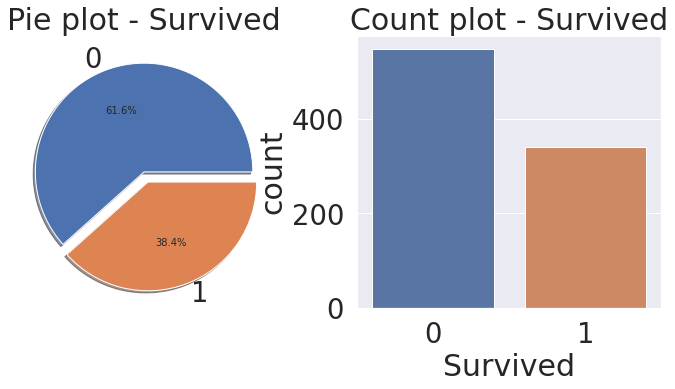

In [11]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))

df_train['Survived'].value_counts().plot.pie(
        explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 죽은 사람이 더 많았다. (생존율: 38.4%)

# 2. Exploratory data analysis
## 2.1 Pclass

- Pclass는 ordinal(서수형) 데이터 - 카테고리이면서 순서가 있는 데이터 타입
- Pclass에 따른 생존율의 차이를 보자

In [12]:
# count() : 각 class에 몇 명이 있는지

df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [13]:
# sum() : 생존한 사람의 총합 (survived=1)

df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
# 위 두 과정을 좀 더 간단하게 보기

pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

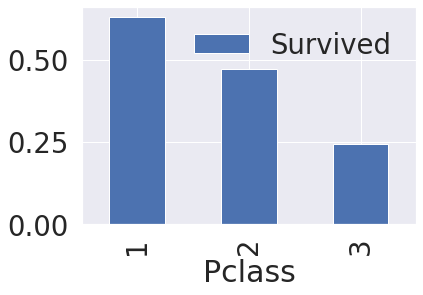

In [15]:
# 각 클래스별 생존률 그래프

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- Pclass가 좋을수록 생존율이 높네!

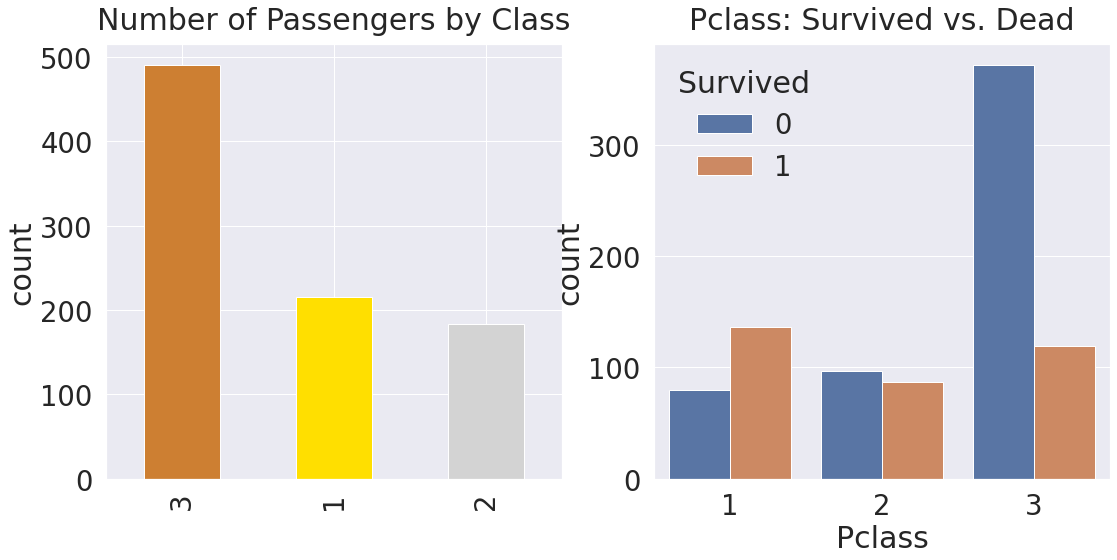

In [16]:
# seaborn의 countplot 이용해 그려보기

y_position = 1.02

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Class', y=y_position)
ax[0].set_ylabel('count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead', y=y_position)

plt.show()

- 클래스가 높을수록 생존율(1)이 높다.

## 2.2 Sex

- 성별에 따라 생존률이 어떻게 달라지는지 확인하기

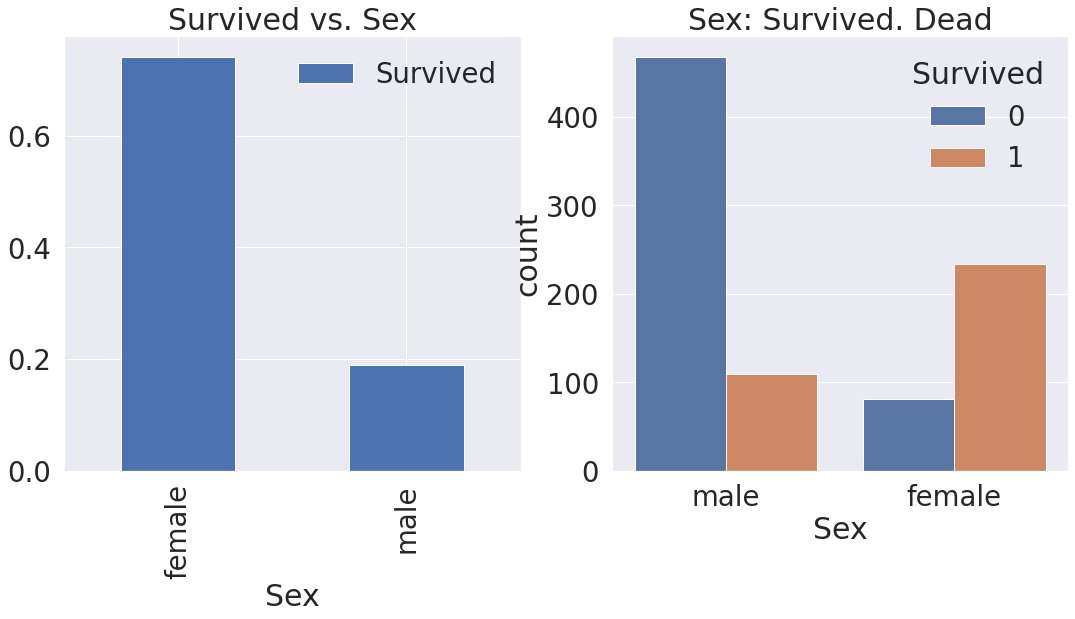

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived. Dead')

plt.show()

- 여자가 생존할 확률이 높다.

In [18]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


# 2.3 Both Sex and Pclass

- Sex, Pclass 두 가지 feature에 관해 생존률이 어떻게 달라지는지 확인해보기

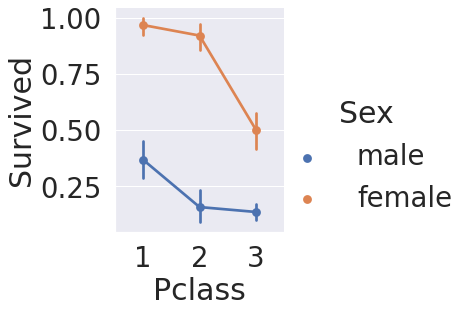

In [20]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=4, aspec=1.5)

- 모든 클래스에 대해 여성이 남성보다 생존율이 높다.
- sex와 관계없이 클래스가 높을수록 생존율이 높다.

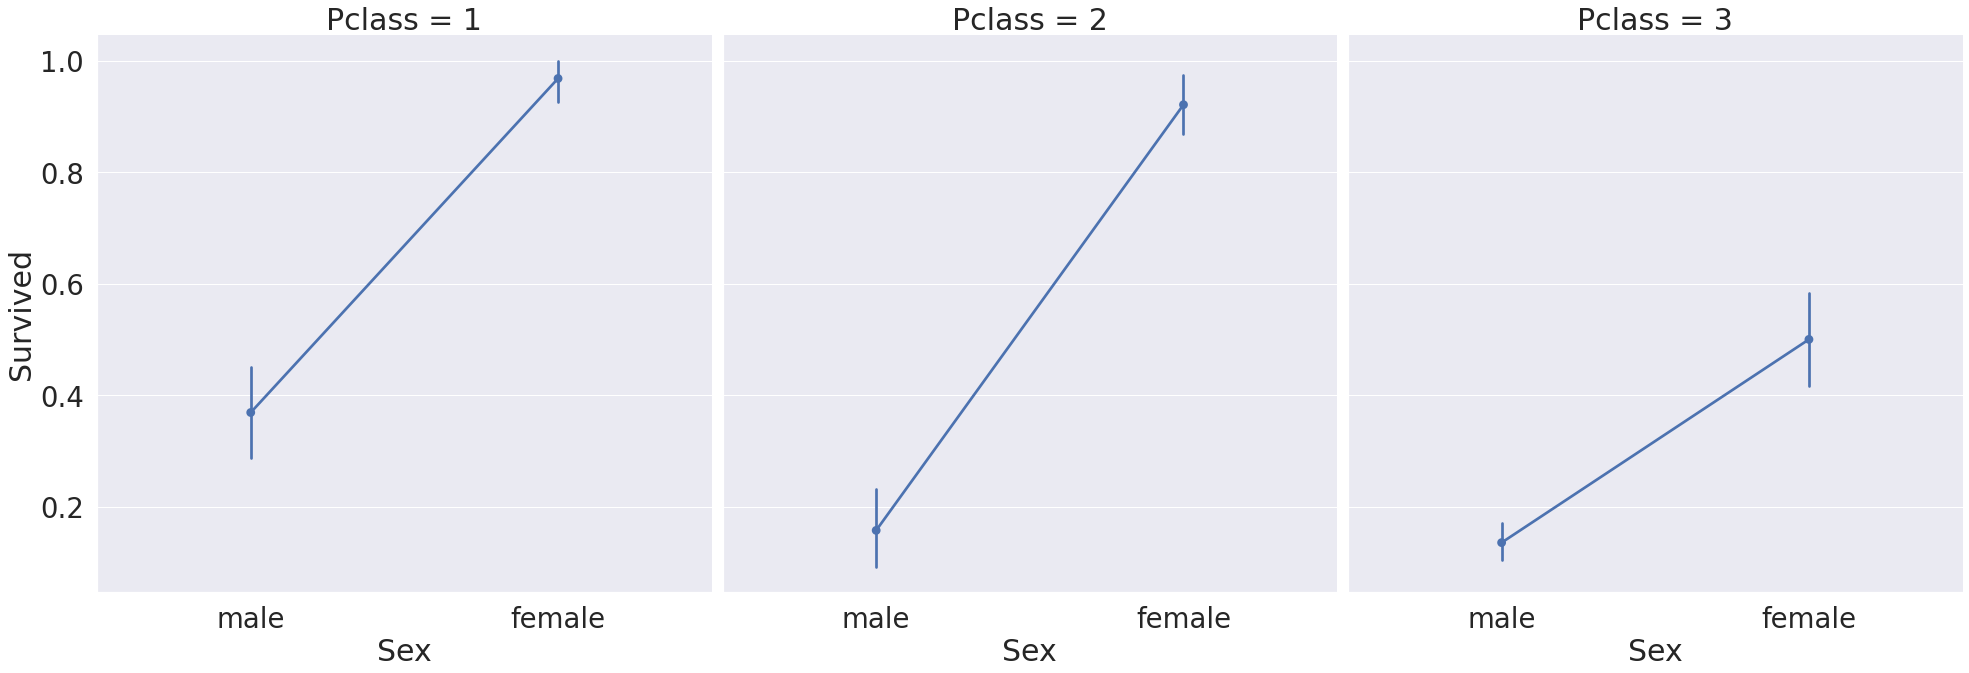

In [21]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, 
              satureation=.5, size=9, aspect=1)

# 2.4 Age

- kdeplot (커널밀도추정)

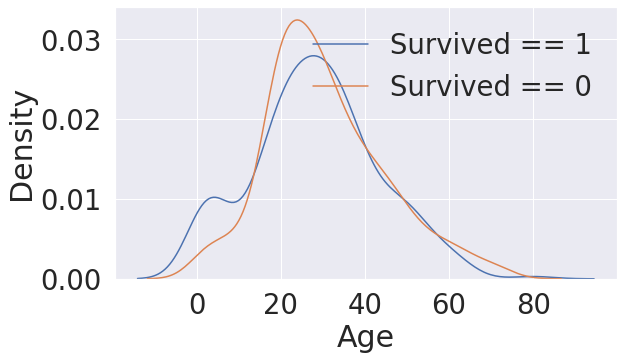

In [22]:
# 생존에 따른 Age의 histogram 그리기

fig, ax = plt.subplots(1, 1, figsize=(9, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)

plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 나이가 어릴수록 생존률이 높다.

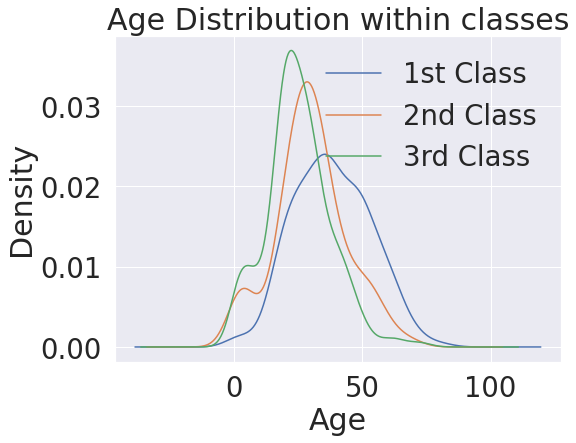

In [23]:
plt.figure(figsize=(8, 6))

df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- 클래스가 높을수록 나이 어린 사람의 비중이 커진다.

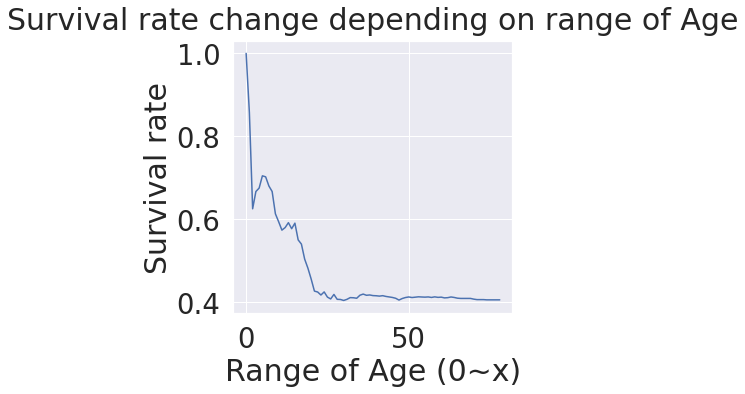

In [24]:
# 나이대가 변하면서 생존률이 어떻게 되는지 확인하자

cummulate_survival_ratio = []

for i in range(1, 80):
    cummulate_survival_ratio.append(
        df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(5, 5))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age (0~x)')
plt.show()

- 정말, 나이가 어릴수록 생존율이 확실히 높구나!
- Age 또한 중요한 feature이다.

# 2.5 Pclass, Sex, Age

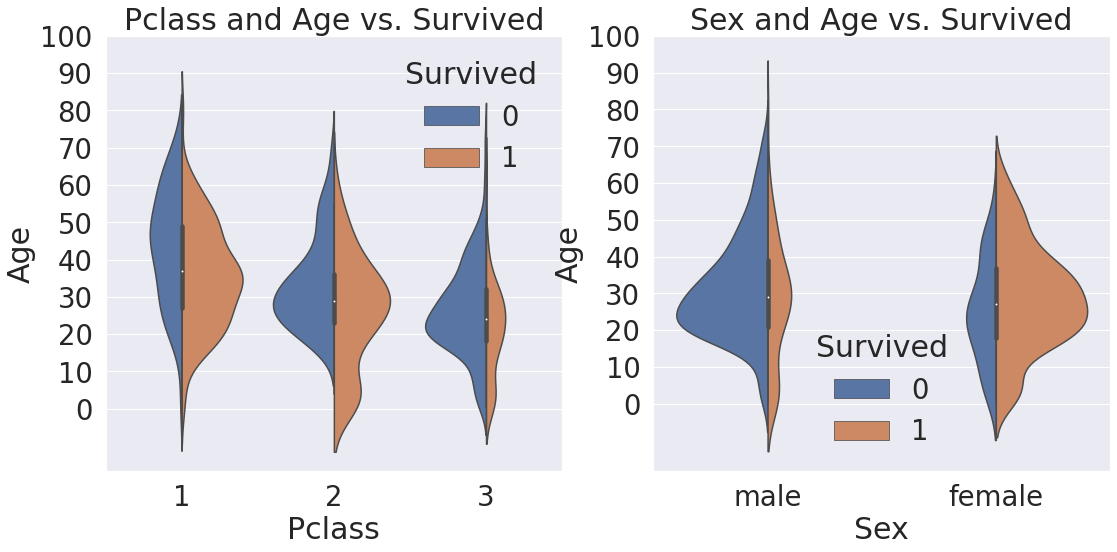

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

- 나이가 어릴수록 생존을 많이 한다.
- 여자가 생존을 많이 한다.
- -> 여성과 아이를 먼저 챙기구나

## 2.6 Embarked

- Embarked : 탑승한 항구

<AxesSubplot:xlabel='Embarked'>

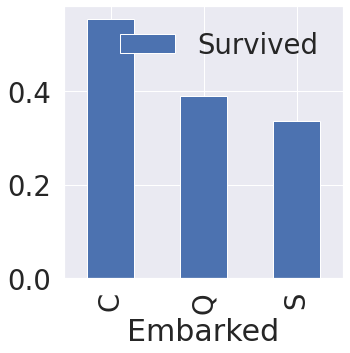

In [26]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- C 항구 탑승객의 생존률이 가장 높구나

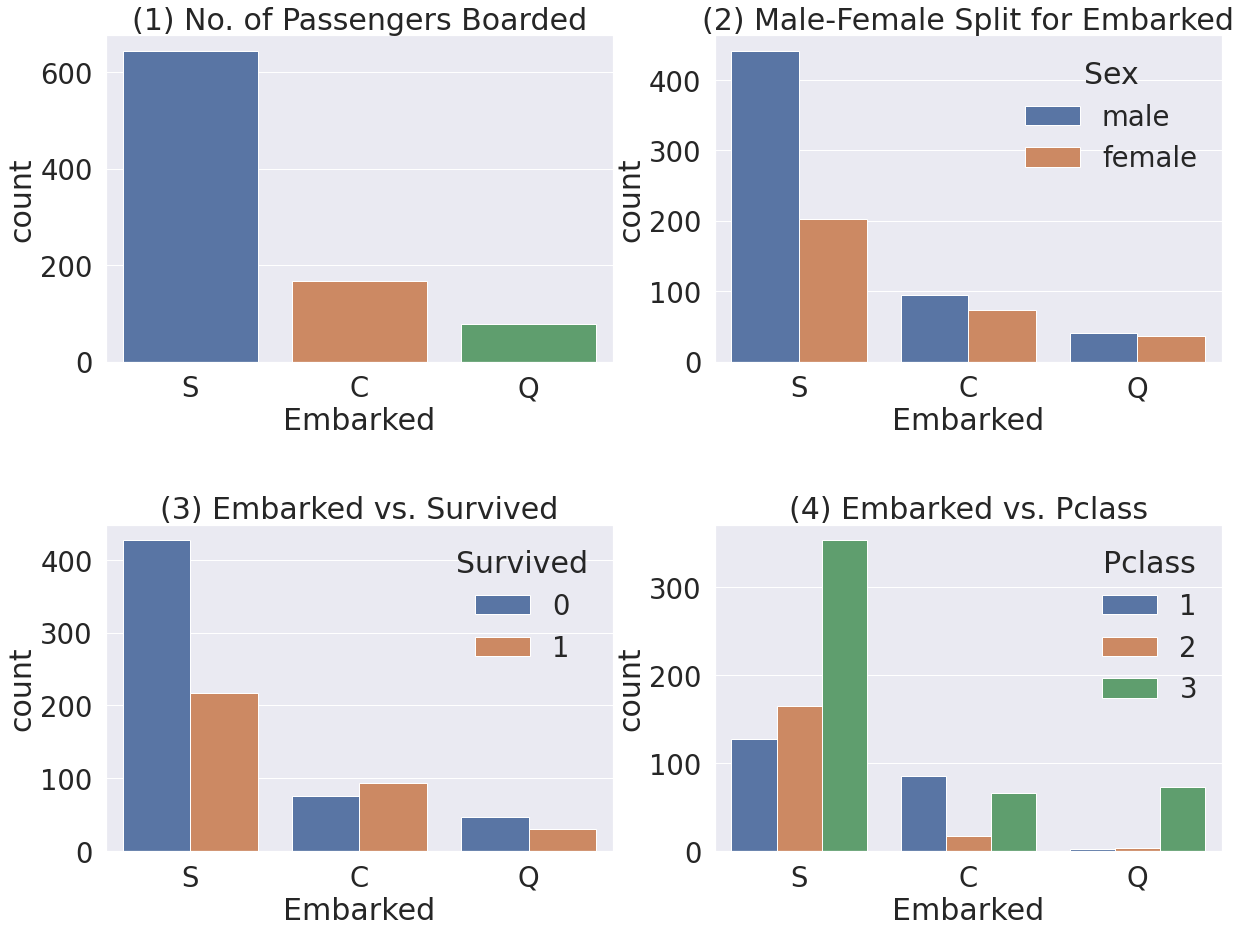

In [27]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs. Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- (1) S 항구에 가장 많은 사람 탑승
- (2) C, Q 항구는 남녀의 비율이 비슷하고, S 항구는 남자가 더 많음
- (3) S 항구의 생존률이 가장 낮음
- (4) C 항구의 생존률이 가장 높은 이유는 클래스가 높은 사람이 많이 타서!
  - (S는 3rd 클래스가 많이 타서 생존률 낮음)

# 2.7 Family - SibSp (형제 자매) + Parch(부모, 자녀)

- SibSp와 Parch를 합치면 Famiy가 된다.

In [28]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

# 자기 자신 포함해야 하므로 +1

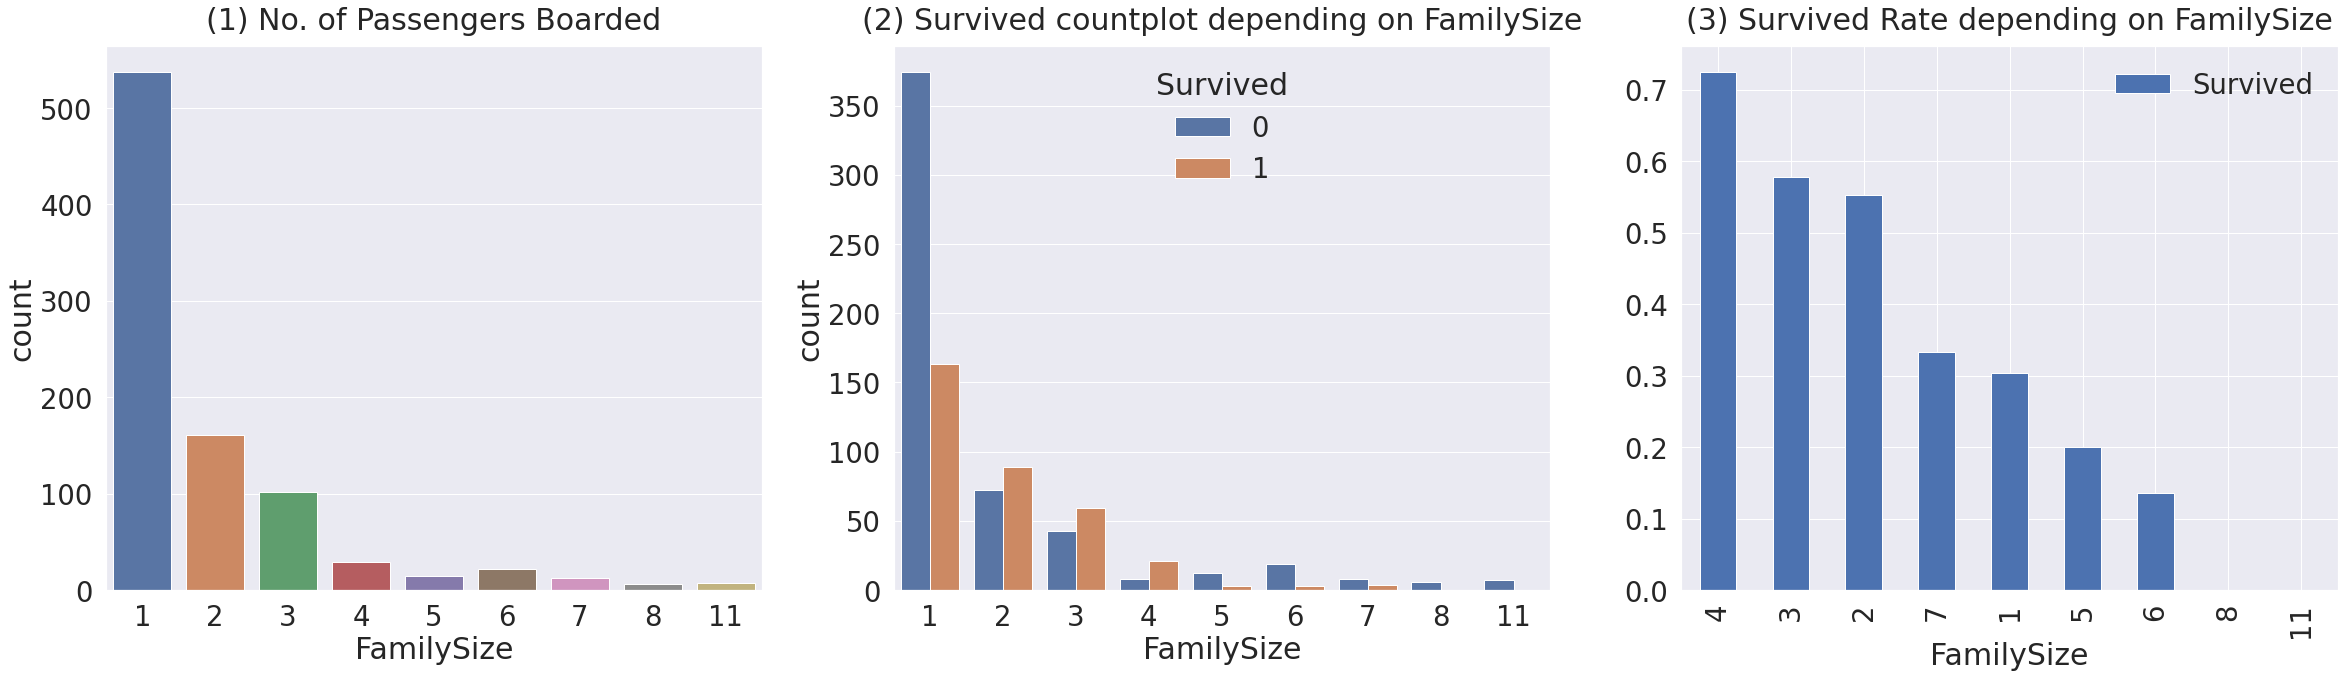

In [29]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], 
                as_index=True).mean().sort_values(by='Survived', 
                        ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived Rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- (1) 가족 크기가 1~11 까지 있다.
  - 대부분 1명이고, 그 다음으로 2, 3, 4명이 많다.
- (2), (3) 가족이 4명인 경우 가장 생존률이 높다.
  - 가족 수가 너무 작아도(1), 너무 커도(5, 6, 7, 11) 생존률이 낮아진다.

## 2.8 Fare

- Fare : 탑승 요금 (continuous feature)

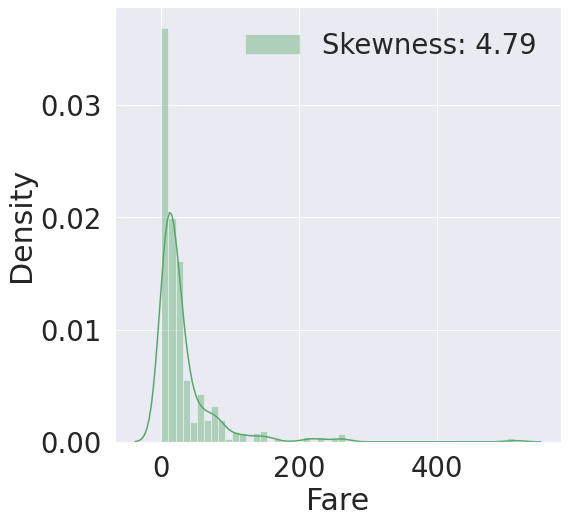

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='g', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)

g = g.legend(loc='best')

- distribution이 매우 비대칭이다. (높은 skewness)
  - 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수 있다.
- outlier의 영향을 줄이기 위해 Fare에 log를 취해주자
  - map, apply를 사용하자

In [31]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

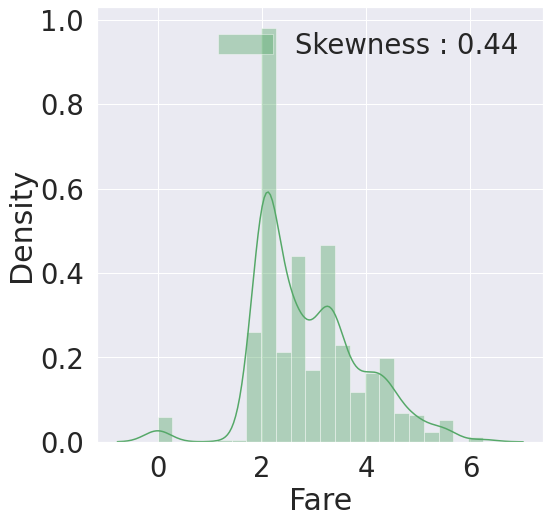

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

g = sns.distplot(df_train['Fare'], color='g', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log를 취하니 비대칭성이 많이 사라졌다.
- 이같은 행위는 feature engineering이다.
  - 모델을 학습시키기 위해 + 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것

## 2.9 Cabin

- NaN이 대략 80%이여서, 생존률에 깊은 영향을 미치지 않는다.
- 모델에 포함시키지 않겠다.

In [33]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## 2.10 Ticket

- NaN이 없다.
- string data이므로 어떤 작업을 해주어야 실제 모델을 사용할 수 있다.
- 매우 다양해 모델에 포함시키지 않겠다.

In [34]:
df_train['Ticket'].value_counts()

347082        7
CA. 2343      7
1601          7
347088        6
3101295       6
             ..
349240        1
11755         1
350036        1
C.A. 29395    1
19988         1
Name: Ticket, Length: 681, dtype: int64

# 3. Feature Engineering

- 가장 먼저 dataset에 존재하는 null data르 ㄹ채우자
  - null data를 포함하는 feature의 statistics를 참고하거나, 다른 아이디어를 짜내어 채우자
- null data를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지된다.
- train 뿐만 아니라 test에도 똑같이 적용해주어야 한다. **

## 3.1 Fill Null
### 3.1.1 Fill Null in Age using title

- Age에는 null data가 177개가 있다. -> title + statistics 사용하기
- 탑승객의 이름에 포함된 title (Miss, Mr, Mrs, ...)

In [35]:
# title을 extract해 새로운 column 만들기

df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [36]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 남자와 여자가 쓰는 initial을 구분해보자

In [37]:
# replace를 이용해 특정 데이터 값을 원하는 값으로 치환하기

df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [38]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- 여성과 관계있는 Miss, Mrs의 생존율이 높은 것을 확인할 수 있다.

<AxesSubplot:xlabel='Initial'>

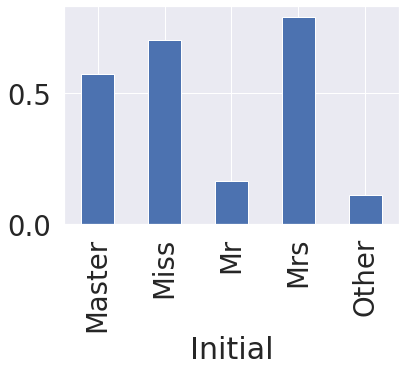

In [39]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

- 이제 null data를 채워보자.
- train에서 얻은 statistics를 기반으로 test의 null data를 채우자

In [40]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- Age의 평균을 이용해 null data를 채워보자

In [41]:
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=='Other'), 'Age'] = 46

In [42]:
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=='Other'), 'Age'] = 46

### 3.1.2 Fill Null in Embarked

In [43]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


- Embarked에는 null value가 2개 있고, S에서 가장 많은 탑승객이 있었으므로, 간단하게 null을 S로 채우겠다.

In [44]:
df_train['Embarked'].fillna('S', inplace=True)

## 3.2 Change Age (continuous to categorical)

- 현재 Age는 continuous feature이다.
  - -> Age를 몇 개의 group으로 나누어 category화 시켜주자

In [45]:
# 1. loc을 사용해 직접 하기

df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

In [46]:
df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [47]:
# 2. 간단한 함수를 만들어 apply 메소드에 넣어주기 (훨씬 수월)

def category_age(x):
    if x<10:
        return 0
    elif x<20:
        return 1
    elif x<30:
        return 2
    elif x<40:
        return 3
    elif x<50:
        return 4
    elif x<60:
        return 5
    elif x<70:
        return 6
    else:
        return 7

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

- 두 가지 방법이 모두 잘 적용되었다면, 둘은 같은 결과를 내야 한다.
- 이를 all() 메소드를 이용해 확인해보자

In [48]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

# 모든 값이 true면 True / 하나라도 false면 False

True

- 중복되는 Age_cat_2 컬럼과 원래 컬럼 Age를 제거하겠다.

In [49]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

# 3.3 Change Initial, Embarked and Sex (string to numerical)

- 현재 Initial은 Mr, Mrs, ... 총 5개로 이루어졌다.
  - -> 이런 카테고리로 된 데이터를 모델에 input으로 넣어줄 때 수치화 시켜줘야 한다.
- map 메소드 이용하기

In [50]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

- Embarked도 C, Q, S로 이루어져 있다.
  - -> 마찬가지로 map을 이용해 수치화 시켜주자

In [51]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

- null이 사라졌는지 any()로 확인해주기

In [52]:
df_train['Embarked'].isnull().any()

# any() : true가 단 하나라도 있을 시 True
# 우리는 null이 없으므로 false

False

- Sex도 map을 이용하여 바꿔보자

In [53]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

### Pearson Correlation

- 각 feature 간의 상관관계를 보자 : (-1, 1) 사이
- 우리는 여러 feature들을 가졌다.
  - -> 이를 하나의 matrix 형태로 보면 편할 것이다: heatmap plot

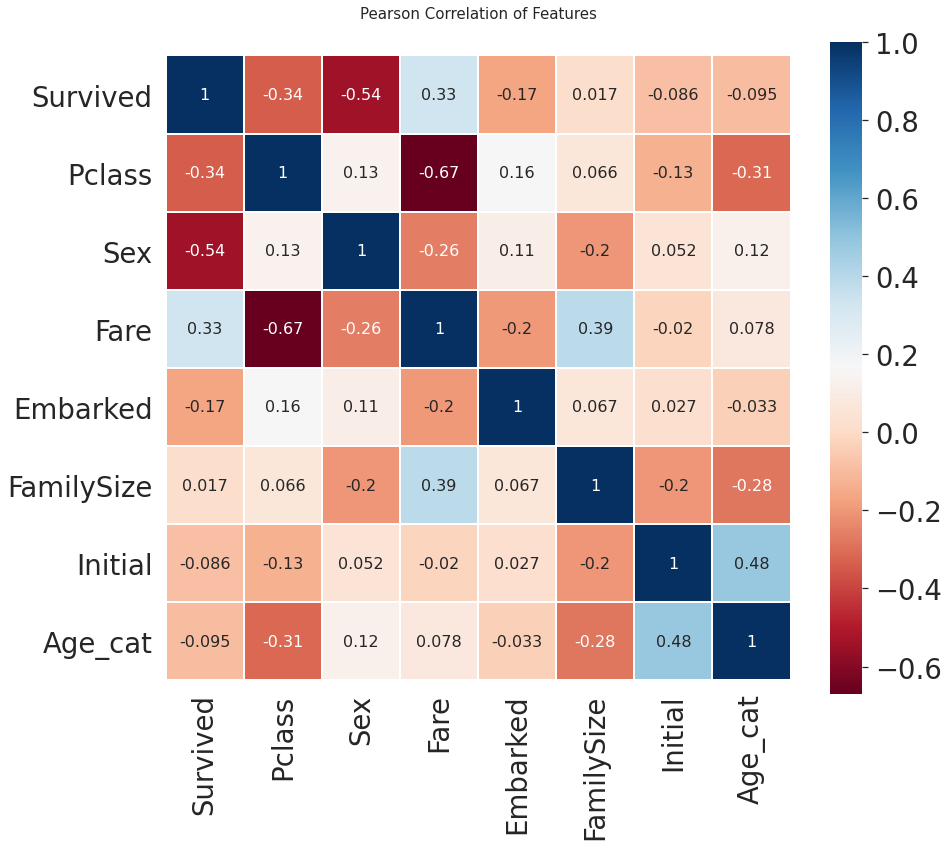

In [54]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, 
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

- 생각보다 강한 상관관계를 가진 feature들이 없다.
  - 모델을 학습시킬 때 불필요한 feature가 없다.

## 3.4 One-hot encoding on Initial and Embarked

- 모델의 성능을 높이기 위해 one-hot encoding을 해주자
- (0, 1)로 이루어진 5차원의 벡터로 나타내기 : get_dummies 이용

In [55]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')

In [56]:
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [57]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0


- 총 5개의 column이 생겼다.

- Embarked에도 적용해보자

In [58]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix="Embarked")

In [59]:
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

- 카테고리가 100개가 넘어가는 경우, one-hot encoding은 비효율적일 수 있다.

## 3.5 Drop columns

- 필요한 columns만 남기고 다 지우자

In [60]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [61]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [62]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


- Survived feature (target class)를 제외하고는 모두 같은 columns를 가졌다.

# 4. Building machine learning model and prediction using the trained model

- sklearn을 이용해 본격적으로 머신러닝 모델 만들자

In [63]:
# importing all the required ML packages

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics # 모델 평가 위해
from sklearn.model_selection import train_test_split # training set 쉽게 나눠주는 함수

- 우리의 titanic은 target class(Survived)가 있으며, target class는 0과 1로 이루어져 있으므로 binary classification 문제이다.
- 우리가 현재 가진 train set의 Survived를 제외한 input을 가지고 모델을 최적화시켜 각 샘플(탑승객)의 생존유무를 판단하는 모델을 만들자
- 그 후, 모델이 학습하지 않았던 test set을 input으로 주어 test set의 각 샘플(탑승객)의 생존 유무를 예측해보자

## 4.1 Preparation - Split datset into train, vaoid, test set

- 학습에 쓰일 데이터와 target label(Survived)를 분리하자 : drop 이용

In [64]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

- train, test 뿐만 아니라 실제 좋은 모델을 만들기 위해 valid set을 따로 만들어 모델 평가를 해보자
- train_test_split을 사용해 train 셋을 쉽게 분리할 수 있다.

In [65]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

- 일단 기본 default 세팅으로 파라미터 튜닝을 진행하겠다.
- 모델 객체를 만들고, fit 메소드로 학습시킨다.
- 그런 뒤 valid set input을 넣어주어 예측값(X_vld sample(탑승객)의 생존여부)을 얻는다.

# 4.2 Model generation and prediction

In [66]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [67]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

# prediction(예측)과 y_vld(실제) 의 정확도를 확인하기

총 268명 중 82.46% 정확도로 생존을 맞춤


## 4.3 Feature importance

- 학습한 모델은 feature importance를 가지는데,
- 우리는 이를 확인해 지금 만든 모델이 어떤 feature에 영향을 많이 받았는지 확인할 수 있다.

In [68]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

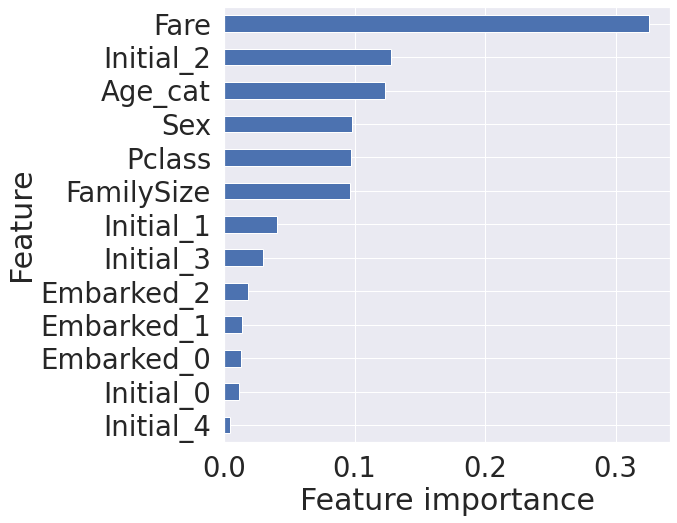

In [69]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

- 우리가 얻은 모델에서는 Fare가 가장 큰 영향력을 가지며, 그 뒤로는 Initial_2, Age_cat, ...
- feature importance는 지금 모델에서의 importance를 나타냄
  - 다른 모델에서는 feature importance가 다르게 나올 수 있음

# 4.4 Prediction on Test set

- 모델이 학습하지 않았던 test set을 모델에 주어 생존여부를 예측해보자

In [70]:
# 캐글에서 준 파일, gender_submission.csv 파일을 읽어 제출 준비하기
submission = pd.read_csv('../input/titanic/gender_submission.csv')

In [71]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


- 이제 test set에 대해 예측을 하고, 결과를 csv 파일로 저장하기

In [72]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [73]:
submission.to_csv('./my_first_submission.csv', index=False)